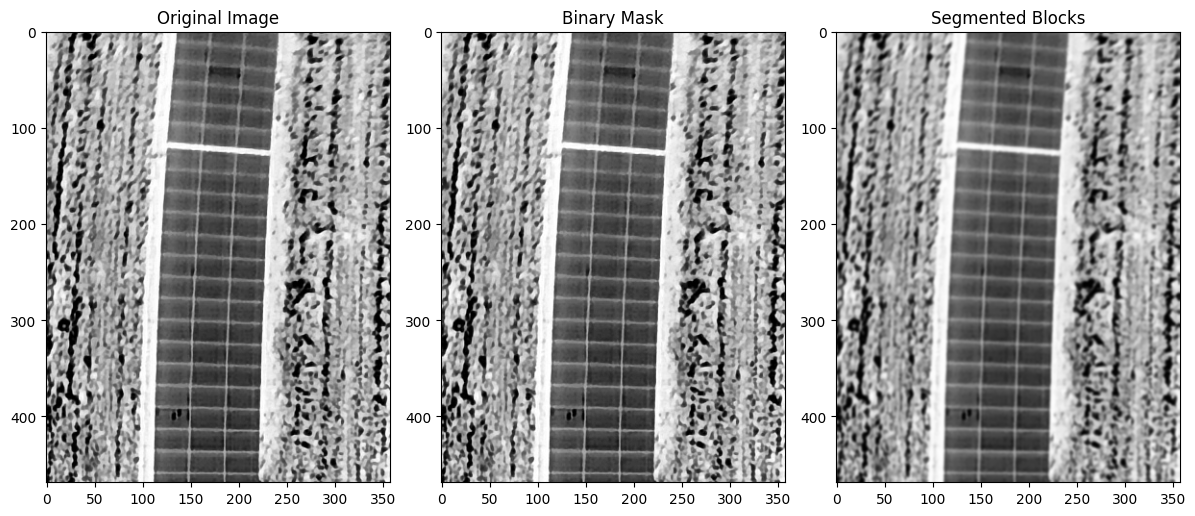

In [33]:
# open image 
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img/img7c.JPG')
image_inv = cv2.bitwise_not(image)
#convert to grayscale:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Binary Mask")
plt.imshow(gray, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Segmented Blocks")
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

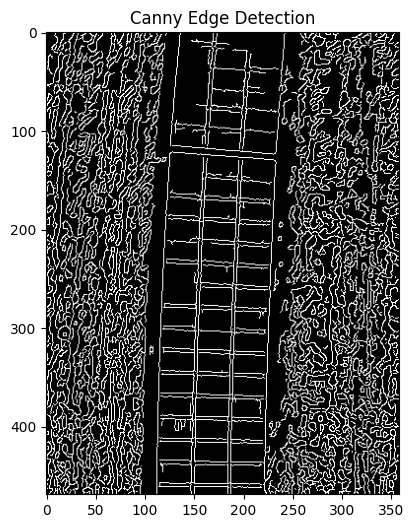

In [34]:
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

#plot the edges
plt.figure(figsize=(12, 6))
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.show()

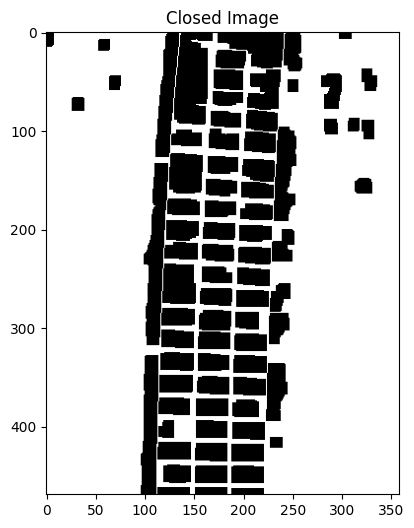

In [35]:
ks = 11  # kernel size
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ks, ks))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

#plot the closed image

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Closed Image")
plt.imshow(closed, cmap='gray')


[[[188 463]]

 [[188 468]]

 [[220 468]]

 [[220 463]]]


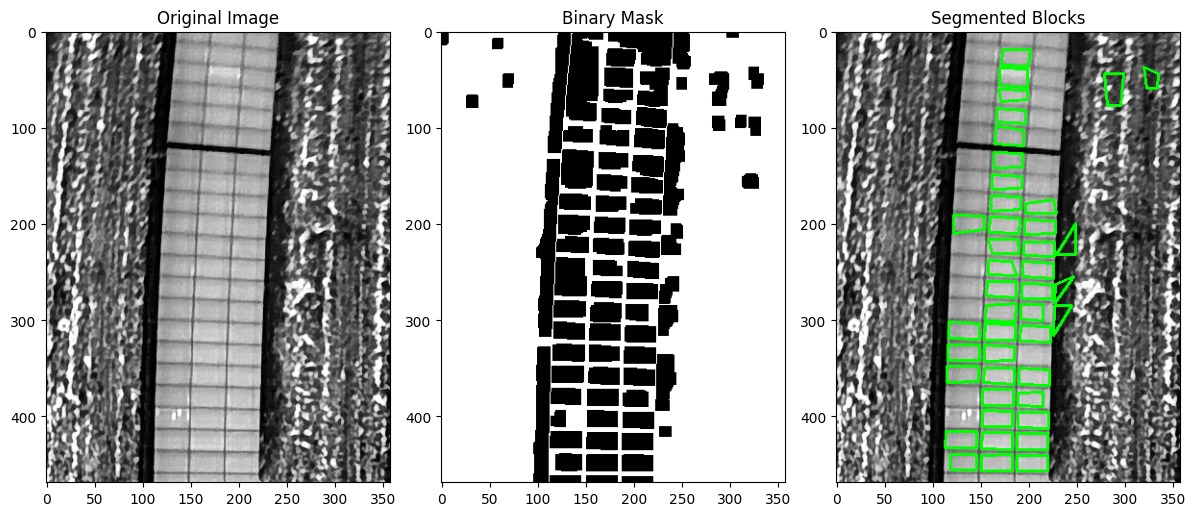

In [36]:
#invert edges
inv_edges = cv2.bitwise_not(closed)
# Find contours
contours, _ = cv2.findContours(inv_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours[0])

min_area = 250
max_area = 1000
# Draw contours (bounding boxes) on the _cv
output = image_inv.copy()
for contour in contours:
    # Filter based on area to ignore noise
    area = cv2.contourArea(contour)
    if area > min_area and area < max_area:
        # x, y, w, h = cv2.boundingRect(contour)
        # cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # draw polygon instead
        epsilon = 0.1*cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour,epsilon,True)
        cv2.drawContours(output, [approx], 0, (0, 255, 0), 2)
        

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image_inv, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Binary Mask")
plt.imshow(closed, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Segmented Blocks")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()
